In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.models import load_model
from sklearn.metrics import confusion_matrix
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.misc

### Single layer ConvNet

Found 2600 images belonging to 2 classes.
[[ 0.16346154  0.33653846]
 [ 0.39692308  0.10307692]]
0.266538461538
[ True]
[False]
[ True]
[False]
[ True]


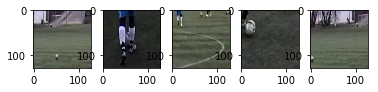

In [5]:
N = 2600 # Images in test set

test_model = load_model('single_layer_net.h5')

test_datagen = ImageDataGenerator(rescale=1. / 255) # Scale image values

generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=1,
        class_mode=None,  # Import data without labels
        shuffle=False)

probabilities = test_model.predict_generator(generator, N)

y_true = np.array( [0] * (N // 2) + [1] * (N // 2) )
y_pred = probabilities > 0.5

np.savetxt( 'data/test/test_pred.txt', np.asarray(y_pred), fmt='%u' )

M = np.zeros( (2,2) )
for i in range(0,N):
    if y_true[i] == 0:
        if y_pred[i] == 0:
            M[0,0] += 1
        else:
            M[0,1] += 1
    else:
        if y_pred[i] == 0:
            M[1,0] += 1
        else:
            M[1,1] += 1
M = M/N
acc = M[0,0]+M[1,1]
print(M)   # Printing confusion matrix
print(acc)  # Printing total accuracy

seq = np.arange(100)+1
np.random.shuffle(seq)

plt.figure()
for i in range(5):
    if seq[i] > (N // 2):
        n = seq[i]-50
        if n<10:
            im = scipy.misc.imread('data/test/no ball/noball_000'+str(n)+'.jpg')
        elif n<100:
            im = scipy.misc.imread('data/test/no ball/noball_00'+str(n)+'.jpg')
        elif n<1000:
            im = scipy.misc.imread('data/test/no ball/noball_0'+str(n)+'.jpg')
        else:
            im = scipy.misc.imread('data/test/no ball/noball_'+str(n)+'.jpg')
    else:
        n = seq[i]
        if n<10:
            im = scipy.misc.imread('data/test/with ball/ball_000'+str(n)+'.jpg')
        elif n<100:
            im = scipy.misc.imread('data/test/with ball/ball_00'+str(n)+'.jpg')
        elif n<1000:
            im = scipy.misc.imread('data/test/with ball/ball_0'+str(n)+'.jpg')
        else:
            im = scipy.misc.imread('data/test/with ball/ball_'+str(n)+'.jpg')
    plt.subplot(1,5,i+1)
    plt.imshow(im)
    print( y_pred[ seq[i]-1 ] )
plt.show() # Plotting random test images with predictions

In [6]:
# Testing model on full frame
N = 1860 # Images in test set

test_model = load_model('single_layer_net.h5')

test_datagen = ImageDataGenerator(rescale=1. / 255) # Scale image values

generator = test_datagen.flow_from_directory(
        'data/test_frame',
        target_size=(150, 150),
        batch_size=1,
        class_mode=None,  # Import data without labels
        shuffle=False)

probabilities = test_model.predict_generator(generator, N)
y_pred = probabilities < 0.5

np.savetxt( 'data/test_frame/test_pred.txt', np.asarray(y_pred), fmt='%u' )
np.savetxt( 'data/test_frame/test_prob.txt', np.asarray(probabilities), fmt='%.4f' )

Found 1860 images belonging to 2 classes.


### Multiple layer ConvNet

Found 2600 images belonging to 2 classes.
[[ 0.02038462  0.47961538]
 [ 0.32846154  0.17153846]]
0.191923076923
[ True]
[ True]
[ True]
[ True]
[ True]


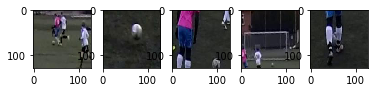

In [9]:
N = 2600 # Images in test set

test_model = load_model('multiple_layer_net.h5')

test_datagen = ImageDataGenerator(rescale=1. / 255) # Scale image values

generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(150, 150),
        batch_size=1,
        class_mode=None,  # Import data without labels
        shuffle=False)

probabilities = test_model.predict_generator(generator, N)

y_true = np.array( [0] * (N // 2) + [1] * (N // 2) )
y_pred = probabilities > 0.5

np.savetxt( 'data/test/test_pred.txt', np.asarray(y_pred), fmt='%u' )

M = np.zeros( (2,2) )
for i in range(0,N):
    if y_true[i] == 0:
        if y_pred[i] == 0:
            M[0,0] += 1
        else:
            M[0,1] += 1
    else:
        if y_pred[i] == 0:
            M[1,0] += 1
        else:
            M[1,1] += 1
M = M/N
acc = M[0,0]+M[1,1]
print(M)   # Printing confusion matrix
print(acc)  # Printing total accuracy

seq = np.arange(100)+1
np.random.shuffle(seq)

plt.figure()
for i in range(5):
    if seq[i] > (N // 2):
        n = seq[i]-50
        if n<10:
            im = scipy.misc.imread('data/test/no ball/noball_000'+str(n)+'.jpg')
        elif n<100:
            im = scipy.misc.imread('data/test/no ball/noball_00'+str(n)+'.jpg')
        elif n<1000:
            im = scipy.misc.imread('data/test/no ball/noball_0'+str(n)+'.jpg')
        else:
            im = scipy.misc.imread('data/test/no ball/noball_'+str(n)+'.jpg')
    else:
        n = seq[i]
        if n<10:
            im = scipy.misc.imread('data/test/with ball/ball_000'+str(n)+'.jpg')
        elif n<100:
            im = scipy.misc.imread('data/test/with ball/ball_00'+str(n)+'.jpg')
        elif n<1000:
            im = scipy.misc.imread('data/test/with ball/ball_0'+str(n)+'.jpg')
        else:
            im = scipy.misc.imread('data/test/with ball/ball_'+str(n)+'.jpg')
    plt.subplot(1,5,i+1)
    plt.imshow(im)
    print( y_pred[ seq[i]-1 ] )
plt.show() # Plotting random test images with predictions

In [8]:
# Testing model on full frame
N = 1860 # Images in test set

test_model = load_model('multiple_layer_net.h5')

test_datagen = ImageDataGenerator(rescale=1. / 255) # Scale image values

generator = test_datagen.flow_from_directory(
        'data/test_frame',
        target_size=(150, 150),
        batch_size=1,
        class_mode=None,  # Import data without labels
        shuffle=False)

probabilities = test_model.predict_generator(generator, N)
y_pred = probabilities < 0.5

np.savetxt( 'data/test_frame/test_pred.txt', np.asarray(y_pred), fmt='%u' )
np.savetxt( 'data/test_frame/test_prob.txt', np.asarray(probabilities), fmt='%.4f' )

Found 1860 images belonging to 2 classes.
